In [1]:
import pandas as pd
import numpy as np
path = 'C:/Users/Gabri/Documents/Python/Coursera IBM/Data Analysis with Python/auto.csv'
df = pd.read_csv(path)

In [2]:
%%capture
! pip install ipywidgets

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'symboling', 'normalized-losses', 'make',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km',
       'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [6]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [7]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
df2 = df._get_numeric_data()
df2.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [10]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))

    #will have to change this to KDE plot
    ax1 = sns.kdeplot(RedFunction, color = "r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color = "b", label = BlueName, ax = ax1)

    plt.title(Title)
    plt.xlabel('Price ($)')
    plt.ylabel('Proportion of cars')
    plt.legend()
    plt.show()
    plt.close()

In [11]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))

    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    x = np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label = 'Training Data')
    plt.plot(xtest, y_test, 'go', label = 'Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), '-.k', label = 'Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [12]:
y_data = df['price']
x_data = df.drop('price', axis = 1)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 1)

print(f"# of test samples: {x_test.shape[0]}")
print(f"# of training samples: {x_train.shape[0]}")

# of test samples: 21
# of training samples: 180


In [14]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.40, random_state = 0)
print(f"# of test samples: {x_test1.shape[0]}")
print(f"# of training samples: {x_train1.shape[0]}")


# of test samples: 81
# of training samples: 120


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [18]:
lr.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [19]:
lr.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [20]:
lr1 = LinearRegression()
lr1.fit(x_train1[['horsepower']], y_train1)
a = lr1.score(x_train1[['horsepower']], y_train1)
b = lr1.score(x_test1[['horsepower']], y_test1)
print(f"Training r2: {a}; Test r2: {b}")


Training r2: 0.5754067463583004; Test r2: 0.7139364665406973


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)
rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [23]:
print("rcross mean", rcross.mean(), "; std. dv: ", rcross.std())

rcross mean 0.522009915042119 ; std. dv:  0.2911839444756029


In [24]:
-1*cross_val_score(lr, x_data[['horsepower']], y_data, cv=4, scoring = 'neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [25]:
rcross2folds = cross_val_score(lr, x_data[['horsepower']], y_data, cv=2)
print(rcross2folds)
print(rcross2folds.mean())

[0.59015621 0.44319613]
0.5166761697127429


In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
yhat = cross_val_predict(lr, x_data[['horsepower']], y_data, cv=4)
yhat[0:10]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598, 13986.46002486, 13986.46002486, 13986.46002486,
       18641.80153159, 12589.85757284])

In [28]:
mlr = LinearRegression()

In [29]:
mlr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [30]:
yhat_train = mlr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [31]:
yhat_test = mlr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

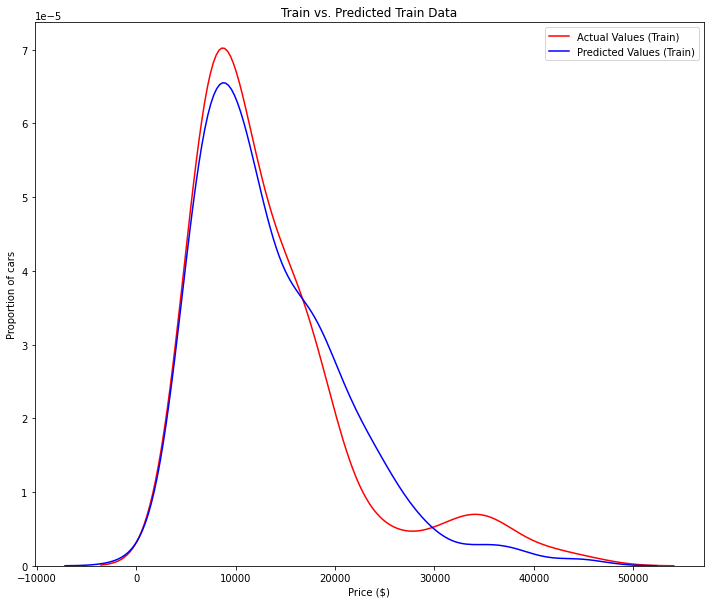

In [33]:
Title = 'Train vs. Predicted Train Data'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

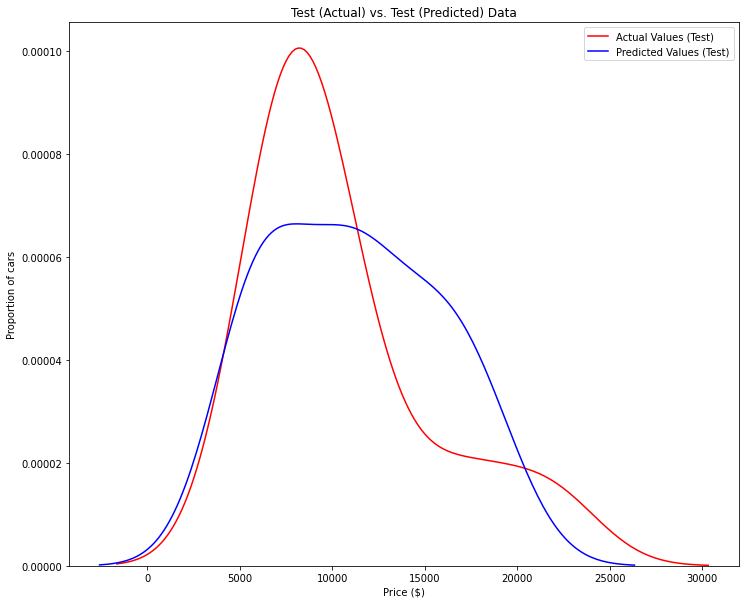

In [34]:
Title = 'Test (Actual) vs. Test (Predicted) Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)
lr = LinearRegression()

In [37]:
rsq_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr, y_train)
    score = lr.score(x_test_pr, y_test)
    #appendvalue = f"Degree: {n}, score: {score}"
    #rsq_test.append(appendvalue)
    rsq_test.append(lr.score(x_test_pr, y_test))
print(rsq_test)

[0.7325101750243117, 0.7405858710699897, 0.7406204232729607, 0.40639663604384924, -29.871340540625788]


Text(3, 0.74, 'Maximum r-squared')

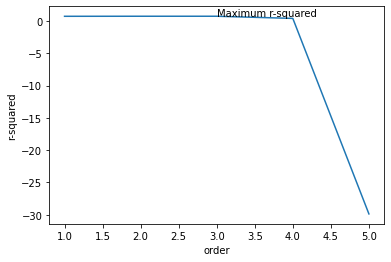

In [38]:
plt.plot(order, rsq_test)
plt.xlabel('order')
plt.ylabel('r-squared')
plt.text(3, 0.74, 'Maximum r-squared')

Text(0.5, 1.0, 'Fifth order polynomial model')

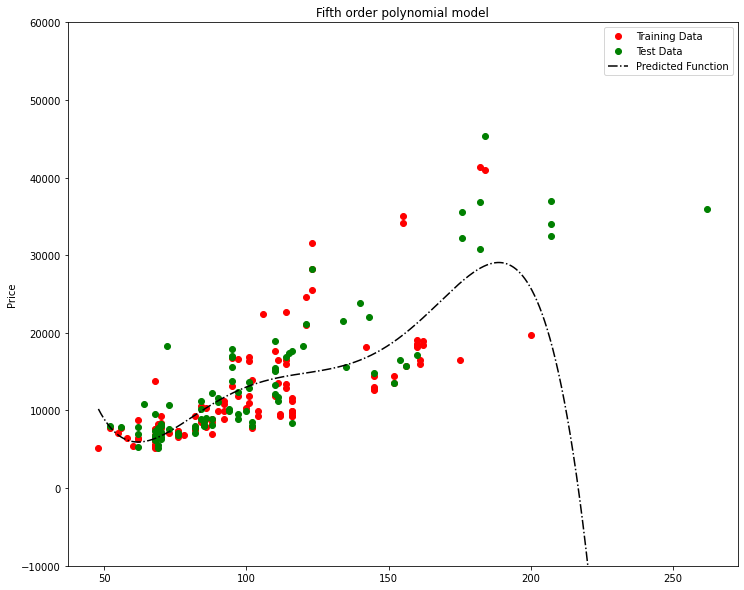

In [39]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, lr, pr)
plt.title('Fifth order polynomial model')

In [40]:
rsq_test = []
order = [3]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr, y_train)
    score = lr.score(x_test_pr, y_test)
    appendvalue = f"Degree: {n}, score: {score}"
    rsq_test.append(appendvalue)
    rsq_test.append(lr.score(x_test_pr, y_test))
print(rsq_test)

['Degree: 3, score: 0.7406204232729607', 0.7406204232729607]


Text(0.5, 1.0, 'Third order polynomial model')

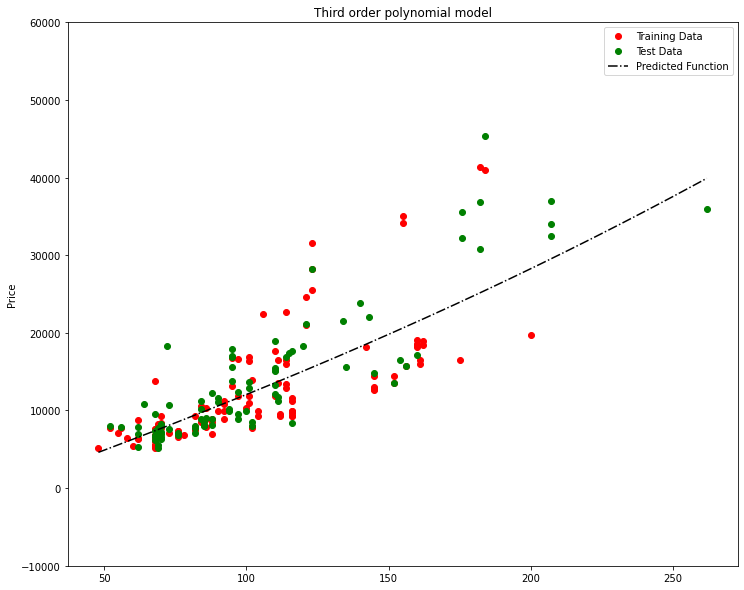

In [41]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, lr, pr)
plt.title('Third order polynomial model')

In [42]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_data, random_state = 0)
    lr = LinearRegression()
    pr = PolynomialFeatures(degree = order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr, y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, lr, pr)
    

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

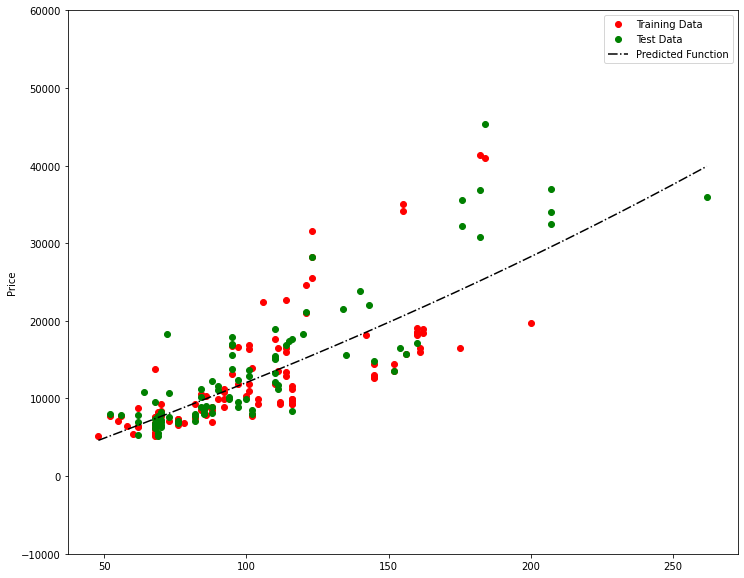

In [43]:
interact(f, order = (0,6,1), test_data = (0.05, 0.95, 0.05))

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = .35, random_state = 0)
pr1 = PolynomialFeatures(degree = 2)
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
lr1 = LinearRegression()
poly1 = lr1.fit(x_train_pr1, y_train)

In [56]:
x_test_pr1.shape

(71, 15)

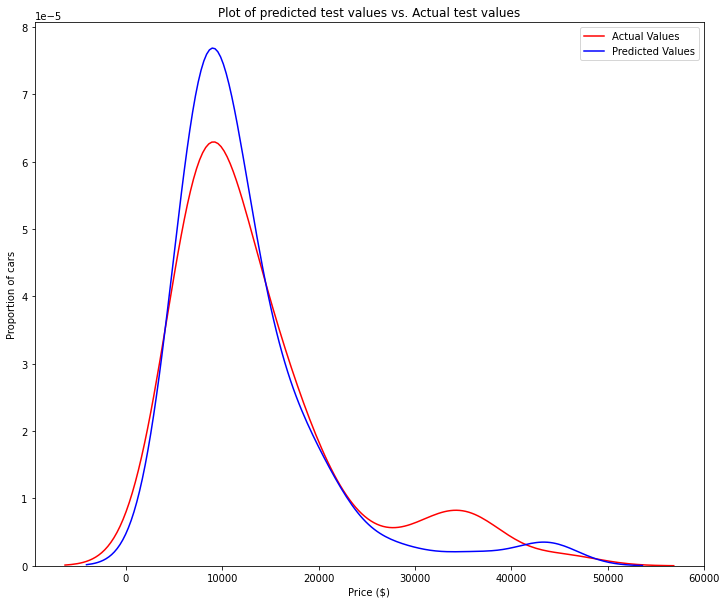

In [57]:
yhat1 = poly1.predict(x_test_pr1)
Title = 'Plot of predicted test values vs. Actual test values'
DistributionPlot(y_test, yhat1, "Actual Values", "Predicted Values", Title)

In [59]:
pr2 = PolynomialFeatures(degree = 2)
x_train_pr = pr2.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr2.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [60]:
from sklearn.linear_model import Ridge

In [61]:
RidgeModel = Ridge(alpha = 1)
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [62]:
yhat = RidgeModel.predict(x_test_pr)

In [69]:
print(yhat[0:5])
print(y_test[0:5].values)

[ 6215.12893986  8404.44202564 21516.45801786 22215.05434015
 22117.97784037]
[ 6295. 10698. 13860. 13499. 15750.]


In [72]:
from tqdm import tqdm

In [79]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha) 
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:05<00:00, 191.13it/s, Test Score=0.489, Train Score=0.871]


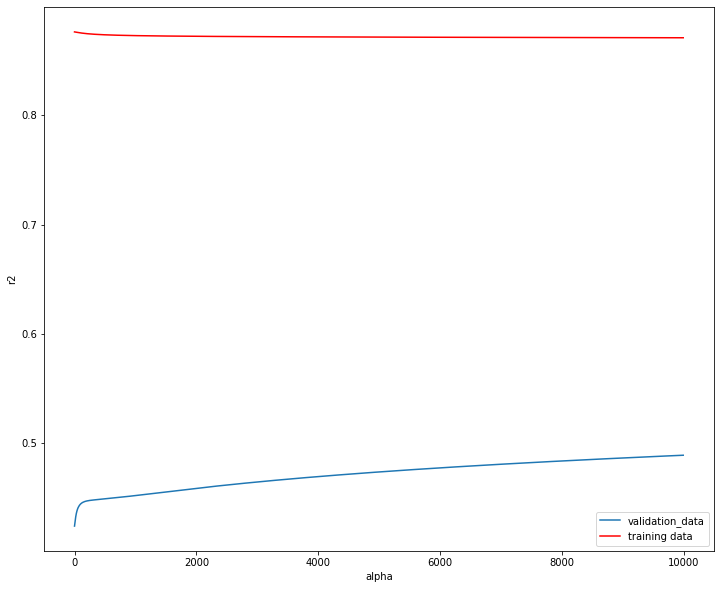

In [80]:
plt.figure(figsize = (12, 10))
plt.plot(Alpha, Rsqu_test, label = 'validation_data')
plt.plot(Alpha, Rsqu_train, 'r', label = 'training data')
plt.xlabel('alpha')
plt.ylabel('r2')
plt.legend()

In [81]:
RidgeModel = Ridge(alpha = 10)
RidgeModel.fit(x_train_pr, y_train)
testscore, trainscore = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
print(testscore, trainscore)

0.4285097809882711 0.8761896305304928


In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameters1 = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR = Ridge()


In [86]:
Grid1 = GridSearchCV(RR, parameters1, cv = 4)

In [87]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [88]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [89]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8320707946603414

In [90]:
BestRR.score(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

0.789203813094003

In [102]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100], 'normalize': [True, False]}]
RR = Ridge()
Grid2 = GridSearchCV(RR, parameters2, cv = 4)
Grid2.fit(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)
BestRR2 = Grid2.best_estimator_
print(BestRR2)
print(BestRR2.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test))

Ridge(alpha=0.1, normalize=True)
0.8743214581557404
